# import

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# make the plt

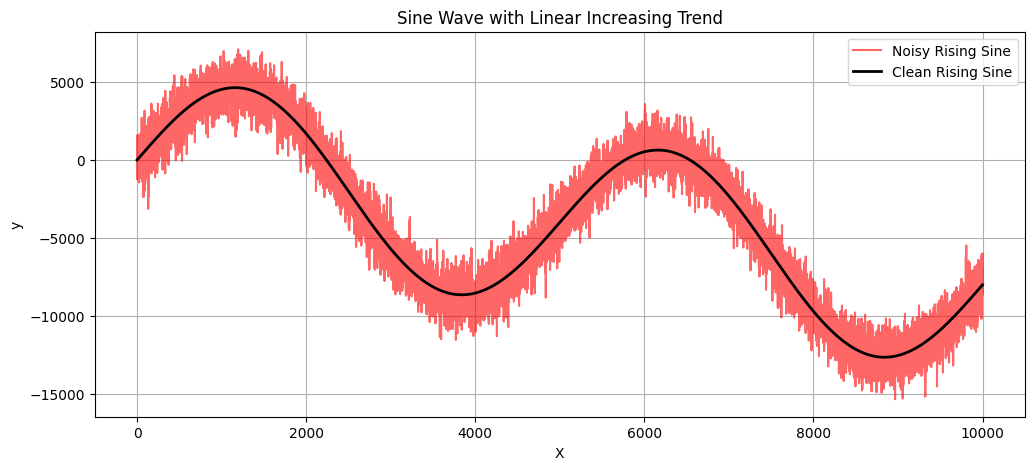

In [5]:

# ساختن اعداد ورودی 
X = np.linspace(0, 10000, 10000)

# ساختن نمودار سیسونی 
y_sin = 600 * np.sin(200 * np.pi * X / 50)
y_sin2 = 5000 * np.sin(2000 * np.pi * X / 500)

# شیب دار کردنش برایه اینکه شبیه عکس بشه
y_shib = -0.8 * X 

# شیبشو خودشو قاطی میکنیم که خطمونو داشته باشیم 
y_combined = y_sin + y_shib + y_sin2

# ساخت داده هایه خروجیمون که قراره پره نویز باشه 
noise = np.random.normal(0, 1000, size=X.shape)
y_noisy = y_combined + noise


plt.figure(figsize=(12, 5))
plt.plot(X, y_noisy, color='red', alpha=0.6, label='Noisy Rising Sine')
plt.plot(X, y_combined, color='black', linewidth=2, label='Clean Rising Sine')
plt.title("Sine Wave with Linear Increasing Trend")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
y_noisy = y_noisy.reshape(-1,1)
X = X.reshape(-1, 1)

# normalise nozy line

## Losso

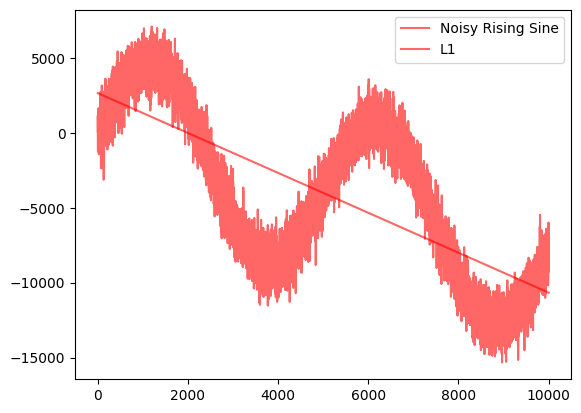

In [38]:
lasso = Lasso(alpha=0.1)

lasso.fit(X, y_noisy)

y_lasso = lasso.predict(X)

plt.plot(X, y_noisy, color='red', alpha=0.6, label='Noisy Rising Sine')
plt.plot(X, y_lasso, color='red', alpha=0.6, label='L1')
plt.legend()
plt.show()



## Ridge

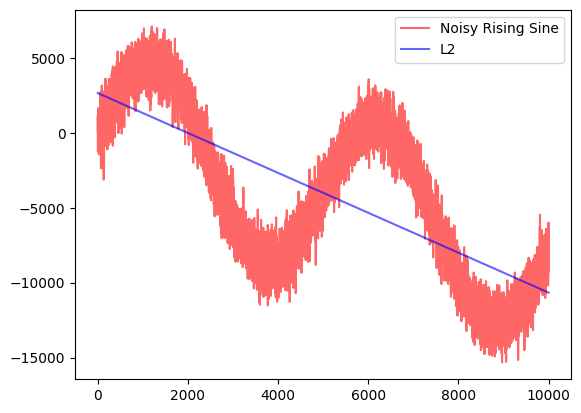

In [19]:
ridge = Ridge(alpha=0.1)

ridge.fit(X, y_noisy)

y_ridge = ridge.predict(X)

plt.plot(X, y_noisy, color='red', alpha=0.6, label='Noisy Rising Sine')
plt.plot(X, y_ridge, color='blue', alpha=0.6, label='L2')
plt.legend()
plt.show()

## Elastoc

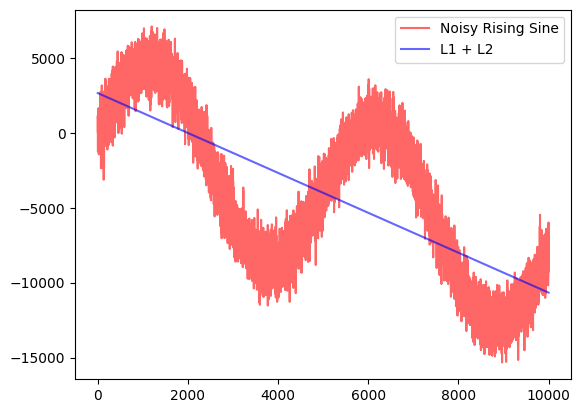

In [22]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic.fit(X, y_noisy)

y_elastic = elastic.predict(X)

plt.plot(X, y_noisy, color='red', alpha=0.6, label='Noisy Rising Sine')
plt.plot(X, y_elastic, color='blue', alpha=0.6, label='L1 + L2')
plt.legend()
plt.show()

## lost plt




In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_samples, n_features = X.shape[:2]

MAX_ITER = 100
LEARNING_RATE = 0.01

params = (0,0)

for i in range(MAX_ITER):
    y_pred = params[0] * x_train + params[1]
    error = y_pred - y_train
    

    gradient = np.dot(x_train.T, error) / n_samples
    params = params - gradient * LEARNING_RATE

mse = np.mean(np.square(y_train, y_pred))
cost_function = []
cost_function.append({"Iter": i, "A": params[0], "B": params[1], "mse": mse})

plt.plot(cost_function)
plt.show()
    







IndexError: index 1 is out of bounds for axis 0 with size 1